In [47]:
import pandas as pd
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('health_data.csv')

# Convert 'StartDate' and 'EndDate' to datetime format
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])

# Filter the DataFrame for data from 2023
df_2023 = df[(df['StartDate'] >= '2023-01-01') & (df['EndDate'] <= '2023-12-31')]

# Filter rows based on data type (HKQuantityTypeIdentifierStepCount)
steps_data = df_2023[df_2023['Type'] == 'HKQuantityTypeIdentifierStepCount'][['Value', 'StartDate', 'EndDate']]

# Group by date and sum the values
daily_steps_sum = (
    steps_data.groupby(steps_data['StartDate'].dt.date)['Value']
    .sum()
    .reset_index()
)

# Create a DataFrame with daily sums of steps
daily_steps_df = daily_steps_sum.rename(columns={'Value': 'Value_steps'})
# Display the result
print("Daily Steps Sum for 2023:")
print(daily_steps_sum)


# Filter rows based on data type (HKQuantityTypeIdentifierBasalEnergyBurned)
basal_energy_data = df_2023[df_2023['Type'] == 'HKQuantityTypeIdentifierBasalEnergyBurned'][['Value', 'StartDate', 'EndDate']]

# Group by date and sum the values
daily_basal_energy_sum = (
    basal_energy_data.groupby(basal_energy_data['StartDate'].dt.date)['Value']
    .sum()
    .reset_index()
)

# Display the result
print("Daily Basal Energy Sum for 2023:")
print(daily_basal_energy_sum)

#Filter rows based on data type (HKQuantityTypeIdentifierBasalEnergyBurned)
active_energy_data = df_2023[df_2023['Type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned'][['Value', 'StartDate', 'EndDate']]

# Group by date and sum the values
daily_active_energy_sum = (
    active_energy_data.groupby(active_energy_data['StartDate'].dt.date)['Value']
    .sum()
    .reset_index()
)

# Display the result
print("Daily Active Energy Sum for 2023:")
print(daily_active_energy_sum)

# Filter data for a specific data type (e.g., HKQuantityTypeIdentifierActiveEnergyBurned)
active_energy_data = df[df['Type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned'][['Value', 'StartDate', 'EndDate']]

# Group by date and sum the values
daily_active_energy_sum = active_energy_data.groupby(active_energy_data['StartDate'].dt.date)['Value'].sum().reset_index()

# Display the first few rows of the resulting DataFrame
print(daily_active_energy_sum)


# Merge DataFrames containing daily sums of basal and active energy
merged_data = pd.merge(daily_basal_energy_sum, daily_active_energy_sum, on='StartDate', how='outer')

# Fill NaN values with 0, assuming NaN means no data for that day
merged_data = merged_data.fillna(0)

# Calculate total energy as the sum of basal and active energy
merged_data['Total_energy'] = merged_data['Value_x'] + merged_data['Value_y']

# Display the resulting DataFrame
print("Daily Total Energy (Basal + Active) for 2023:")
print(merged_data[['StartDate', 'Total_energy']])

/var/folders/v8/k8fk4cy55bb3xkgj8m5hf0r00000gn/T/ipykernel_13455/3407053119.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('health_data.csv')


Daily Steps Sum for 2023:
      StartDate    Value
0    2023-01-01  14106.0
1    2023-01-02   7616.0
2    2023-01-03   5327.0
3    2023-01-04   8101.0
4    2023-01-05   7526.0
..          ...      ...
359  2023-12-26   6049.0
360  2023-12-27   5208.0
361  2023-12-28   5114.0
362  2023-12-29   3274.0
363  2023-12-30   3909.0

[364 rows x 2 columns]
Daily Basal Energy Sum for 2023:
      StartDate     Value
0    2023-03-07     9.213
1    2023-03-08  1481.651
2    2023-03-09  1478.392
3    2023-03-10   1500.78
4    2023-03-11  1451.305
..          ...       ...
294  2023-12-26  1468.364
295  2023-12-27  1475.167
296  2023-12-28  1488.459
297  2023-12-29  1460.395
298  2023-12-30  1446.465

[299 rows x 2 columns]
Daily Active Energy Sum for 2023:
      StartDate    Value
0    2023-03-08  236.332
1    2023-03-09  225.066
2    2023-03-10  120.825
3    2023-03-11     37.7
4    2023-03-12    7.166
..          ...      ...
293  2023-12-26   198.55
294  2023-12-27  146.115
295  2023-12-28  148.0

In [189]:
!pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345098 entries, 0 to 345097
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype                    
---  ------     --------------   -----                    
 0   Type       345098 non-null  object                   
 1   Unit       345097 non-null  object                   
 2   Value      345098 non-null  object                   
 3   StartDate  345098 non-null  datetime64[ns, UTC+03:00]
 4   EndDate    345098 non-null  datetime64[ns, UTC+03:00]
dtypes: datetime64[ns, UTC+03:00](2), object(3)
memory usage: 13.2+ MB


In [45]:
# Display the statistical summary of all numerical columns
print("\nStatistical Summary of Daily Steps")
print(daily_steps_sum['Value'].describe())
print("\nStatistical Summary of Daily Burned Basal Energy")
print(daily_basal_energy_sum['Value'].describe())
print("\nStatistical Summary of Daily Burned Active Energy")
print(daily_active_energy_sum['Value'].describe())
print("\nStatistical Summary of Daily Burned Total Energy")
print(merged_data['Total_energy'].describe())



Statistical Summary of Daily Steps
count      364.0
unique     362.0
top       2899.0
freq         2.0
Name: Value, dtype: float64

Statistical Summary of Daily Burned Basal Energy
count     299.000
unique    299.000
top         9.213
freq        1.000
Name: Value, dtype: float64

Statistical Summary of Daily Burned Active Energy
count     306.000
unique    306.000
top       236.332
freq        1.000
Name: Value, dtype: float64

Statistical Summary of Daily Burned Total Energy
count     307.000000
mean     1600.772599
std       281.421417
min         9.213000
25%      1558.234500
50%      1627.812000
75%      1694.856000
max      2335.306000
Name: Total_energy, dtype: float64


In [53]:
# Assuming 'StartDate' is a datetime column
merged_data['StartDate'] = pd.to_datetime(merged_data['StartDate'])
print(merged_data.columns)
# Sort the DataFrame by 'StartDate' if it's not sorted
merged_data = merged_data.sort_values(by='StartDate')

# Create a new column for the 7-day rolling average of steps
merged_data['steps_7day_avg'] = merged_data['Value_steps'].rolling(window=7).mean()

# Create a new column for the 7-day rolling average of steps
merged_data['energy_7day_avg'] = merged_data['Value_energy'].rolling(window=7).mean()

# Drop NaN values generated by the rolling average
merged_data = merged_data.dropna()

# Display the updated DataFrame
print(merged_data)


Index(['StartDate', 'Value_steps', 'Value_energy', 'steps_7day_avg'], dtype='object')
     StartDate Value_steps Value_energy  steps_7day_avg  energy_7day_avg
6   2023-03-14      2209.0       77.924     5386.000000       144.111714
7   2023-03-15      7853.0      238.663     4651.000000       144.444714
8   2023-03-16      4490.0       142.19     4184.142857       132.605286
9   2023-03-17      2223.0        64.25     3946.571429       124.523143
10  2023-03-18      4209.0      113.171     4280.142857       135.304714
..         ...         ...          ...             ...              ...
293 2023-12-26      6049.0       198.55     4817.000000       132.600857
294 2023-12-27      5208.0      146.115     4892.714286       133.634143
295 2023-12-28      5114.0      148.003     4656.571429       128.102857
296 2023-12-29      3274.0      107.742     4903.142857       137.834714
297 2023-12-30      3909.0      109.784     4840.142857       141.094000

[292 rows x 5 columns]


In [56]:
import pandas as pd

# Assuming 'daily_steps_sum' and 'daily_active_energy_sum' are DataFrames with daily steps and active energy data
# ...

# Convert the 'StartDate' columns to datetime format
daily_steps_sum['StartDate'] = pd.to_datetime(daily_steps_sum['StartDate'])
daily_active_energy_sum['StartDate'] = pd.to_datetime(daily_active_energy_sum['StartDate'])

# Merge the DataFrames on 'StartDate'
merged_data = pd.merge(daily_steps_sum, daily_active_energy_sum, on='StartDate', how='inner', suffixes=('_steps', '_energy'))

# Fill NaN values with 0, assuming NaN means no data for that day
merged_data = merged_data.fillna(0)

# Calculate the correlation between daily steps and active energy burned
correlation = merged_data['Value_steps'].corr(merged_data['Value_energy'])

print(f"Correlation between daily steps and active energy burned: {correlation}")


Correlation between daily steps and active energy burned: 0.9713620805454196


In [57]:
import pandas as pd

# Convert the 'StartDate' columns to datetime format
daily_steps_sum['StartDate'] = pd.to_datetime(daily_steps_sum['StartDate'])
daily_active_energy_sum['StartDate'] = pd.to_datetime(daily_active_energy_sum['StartDate'])

# Merge the DataFrames on 'StartDate'
merged_data = pd.merge(daily_steps_sum, daily_active_energy_sum, on='StartDate', how='inner', suffixes=('_steps', '_energy'))

# Fill NaN values with 0, assuming NaN means no data for that day
merged_data = merged_data.fillna(0)

# Calculate correlation for daily values
correlation_daily = merged_data['Value_steps'].corr(merged_data['Value_energy'])

# Sort the DataFrame by 'StartDate' if it's not sorted
merged_data = merged_data.sort_values(by='StartDate')

# Create a new column for the 7-day rolling average of steps
merged_data['steps_7day_avg'] = merged_data['Value_steps'].rolling(window=7).mean()

# Create a new column for the 7-day rolling average of energy
merged_data['energy_7day_avg'] = merged_data['Value_energy'].rolling(window=7).mean()

# Drop NaN values generated by the rolling average
merged_data = merged_data.dropna()

# Calculate correlation for 7-day rolling values
correlation_7day = merged_data['steps_7day_avg'].corr(merged_data['energy_7day_avg'])

print("Correlation with Daily Number of Steps and Burned Total Energy:", correlation_daily)
print("Correlation with 7-day Rolling Number of Steps and 7-day Rolling Burned Total Energy:", correlation_7day)


Correlation with Daily Number of Steps and Burned Total Energy: 0.9713620805454196
Correlation with 7-day Rolling Number of Steps and 7-day Rolling Burned Total Energy: 0.9743846249655004


In [269]:
from scipy.stats import pearsonr
# Assuming you have daily_steps_sum and daily_active_energy_sum DataFrames
# If not, replace them with the actual DataFrames containing daily steps and active energy data

# Convert the 'StartDate' columns to datetime format
daily_steps_sum['StartDate'] = pd.to_datetime(daily_steps_sum['StartDate'])
daily_active_energy_sum['StartDate'] = pd.to_datetime(daily_active_energy_sum['StartDate'])

# Merge the DataFrames on 'StartDate'
merged_data = pd.merge(daily_steps_sum, daily_active_energy_sum, on='StartDate', how='inner', suffixes=('_steps', '_energy'))

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(merged_data['Value_steps'], merged_data['Value_energy'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.9713620805454198
P-value: 8.535375989025902e-187


In [270]:
# Assuming you have daily_steps_sum, daily_active_energy_sum, and daily_basal_energy_sum DataFrames
# If not, replace them with the actual DataFrames containing daily steps, active energy, and basal energy data

# Convert the 'StartDate' columns to datetime format
daily_steps_sum['StartDate'] = pd.to_datetime(daily_steps_sum['StartDate'])
daily_active_energy_sum['StartDate'] = pd.to_datetime(daily_active_energy_sum['StartDate'])
daily_basal_energy_sum['StartDate'] = pd.to_datetime(daily_basal_energy_sum['StartDate'])

# Merge the DataFrames on 'StartDate'
merged_data = pd.merge(daily_steps_sum, daily_active_energy_sum, on='StartDate', how='inner', suffixes=('_steps', '_active_energy'))
merged_data = pd.merge(merged_data, daily_basal_energy_sum, on='StartDate', how='inner', suffixes=('_active_energy', '_basal_energy'))



# Assuming basal energy data is under the 'Value' column, modify the correlation calculation
correlation_coefficient, p_value = pearsonr(merged_data['Value_steps'], merged_data['Value_active_energy'] + merged_data['Value'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.9658685854300811
P-value: 1.0809426597283913e-175


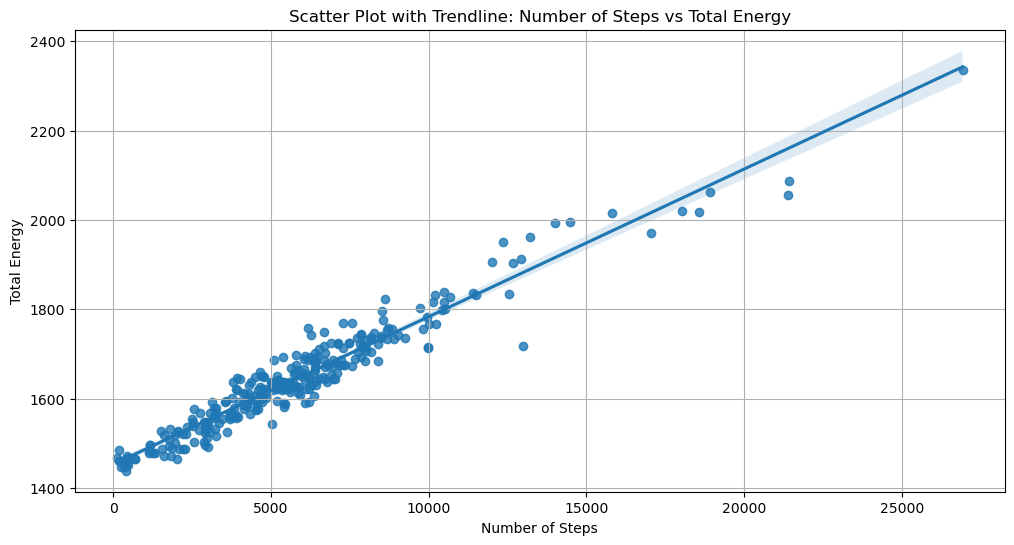

In [228]:
import seaborn as sns
merged_data['Total_energy'] = merged_data['Value_active_energy'] + merged_data['Value']

plt.figure(figsize=(12, 6))

# Scatter plot with trendline for number of steps and total energy
sns.regplot(x='Value_steps', y='Total_energy', data=merged_data)

plt.title('Scatter Plot with Trendline: Number of Steps vs Total Energy')
plt.xlabel('Number of Steps')
plt.ylabel('Total Energy')
plt.grid(True)
plt.show()


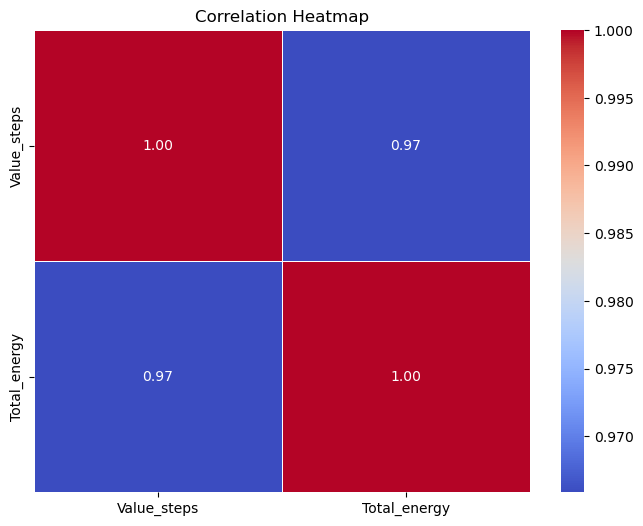

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
merged_data['Total_energy'] = merged_data['Value_active_energy'] + merged_data['Value']
# Assuming 'merged_data' is your DataFrame
correlation_matrix = merged_data[['Value_steps', 'Total_energy']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [277]:
merged_data['Total_energy'] = merged_data['Value_active_energy'] + merged_data['Value']
# Create an imaginary interaction feature by multiplying 'Value_steps' and 'Total_energy'

merged_data['Interaction_Steps_Energy'] = merged_data['Value_steps'] * merged_data['Total_energy']
# Fill NaN values in 'steps_7day_avg' with the mean value of the column
merged_data['steps_7day_avg'] = merged_data['Value_steps'].rolling(window=7).mean()
merged_data['steps_7day_avg'].fillna(merged_data['steps_7day_avg'].mean(), inplace=True)

# Display the updated DataFrame
print("Updated DataFrame with Interaction Feature:")
print(merged_data.head())




Updated DataFrame with Interaction Feature:
   StartDate  Value_steps  Value_active_energy     Value  Total_energy  \
0 2023-03-08      12998.0              236.332  1481.651      1717.983   
1 2023-03-09       7758.0              225.066  1478.392      1703.458   
2 2023-03-10       3886.0              120.825  1500.780      1621.605   
3 2023-03-11       1874.0               37.700  1451.305      1489.005   
4 2023-03-12        354.0                7.166  1440.345      1447.511   

   Interaction_Steps_Energy  steps_7day_avg  
0              2.233034e+07     5806.670744  
1              1.321543e+07     5806.670744  
2              6.301557e+06     5806.670744  
3              2.790395e+06     5806.670744  
4              5.124189e+05     5806.670744  


In [278]:
merged_data.corr()['Interaction_Steps_Energy']

StartDate                   0.075497
Value_steps                 0.992383
Value_active_energy         0.964189
Value                       0.675455
Total_energy                0.960919
Interaction_Steps_Energy    1.000000
steps_7day_avg              0.434726
Name: Interaction_Steps_Energy, dtype: float64

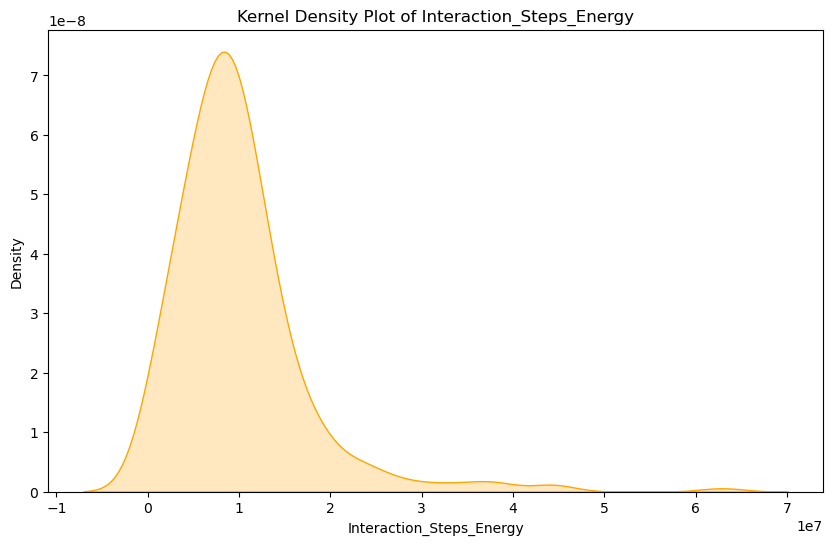

In [279]:
import seaborn as sns

# Plotting a kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(merged_data['Interaction_Steps_Energy'].dropna(), color='orange', fill=True)
plt.title('Kernel Density Plot of Interaction_Steps_Energy')
plt.xlabel('Interaction_Steps_Energy')
plt.ylabel('Density')
plt.show()
#normal distributions

<Axes: >

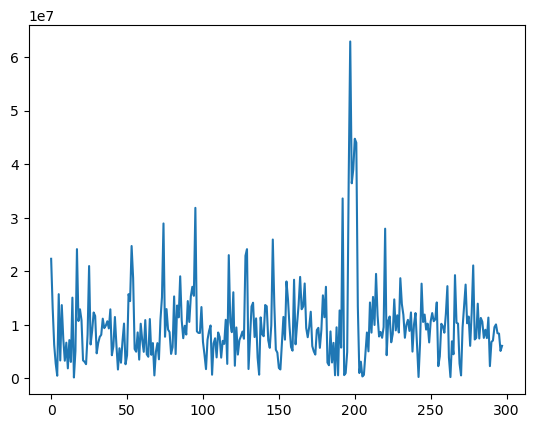

In [280]:
merged_data['Interaction_Steps_Energy'].plot()

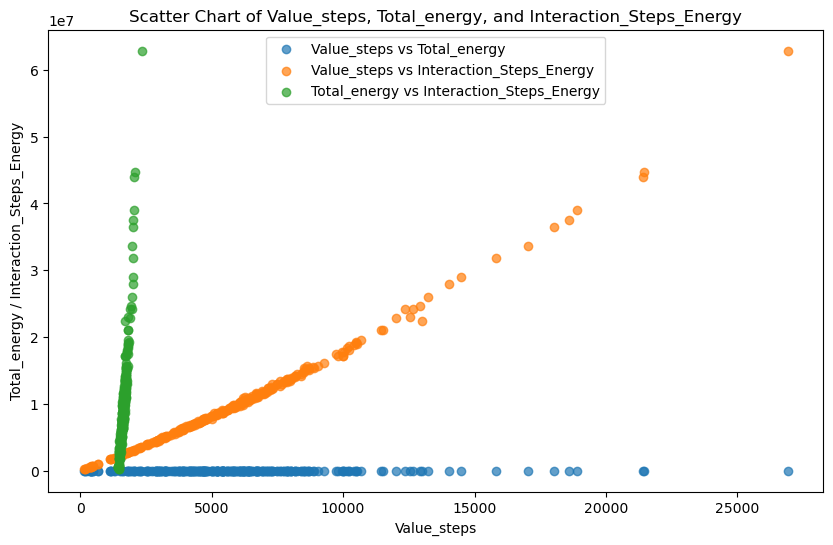

In [281]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'merged_data' with columns 'Value_steps', 'Total_energy', and 'Interaction_Steps_Energy'
# Replace 'YOUR_DATAFRAME' with the actual DataFrame name

plt.figure(figsize=(10, 6))

plt.scatter(merged_data['Value_steps'], merged_data['Total_energy'], label='Value_steps vs Total_energy', alpha=0.7)
plt.scatter(merged_data['Value_steps'], merged_data['Interaction_Steps_Energy'], label='Value_steps vs Interaction_Steps_Energy', alpha=0.7)
plt.scatter(merged_data['Total_energy'], merged_data['Interaction_Steps_Energy'], label='Total_energy vs Interaction_Steps_Energy', alpha=0.7)

plt.title('Scatter Chart of Value_steps, Total_energy, and Interaction_Steps_Energy')
plt.xlabel('Value_steps')
plt.ylabel('Total_energy / Interaction_Steps_Energy')
plt.legend()
plt.show()


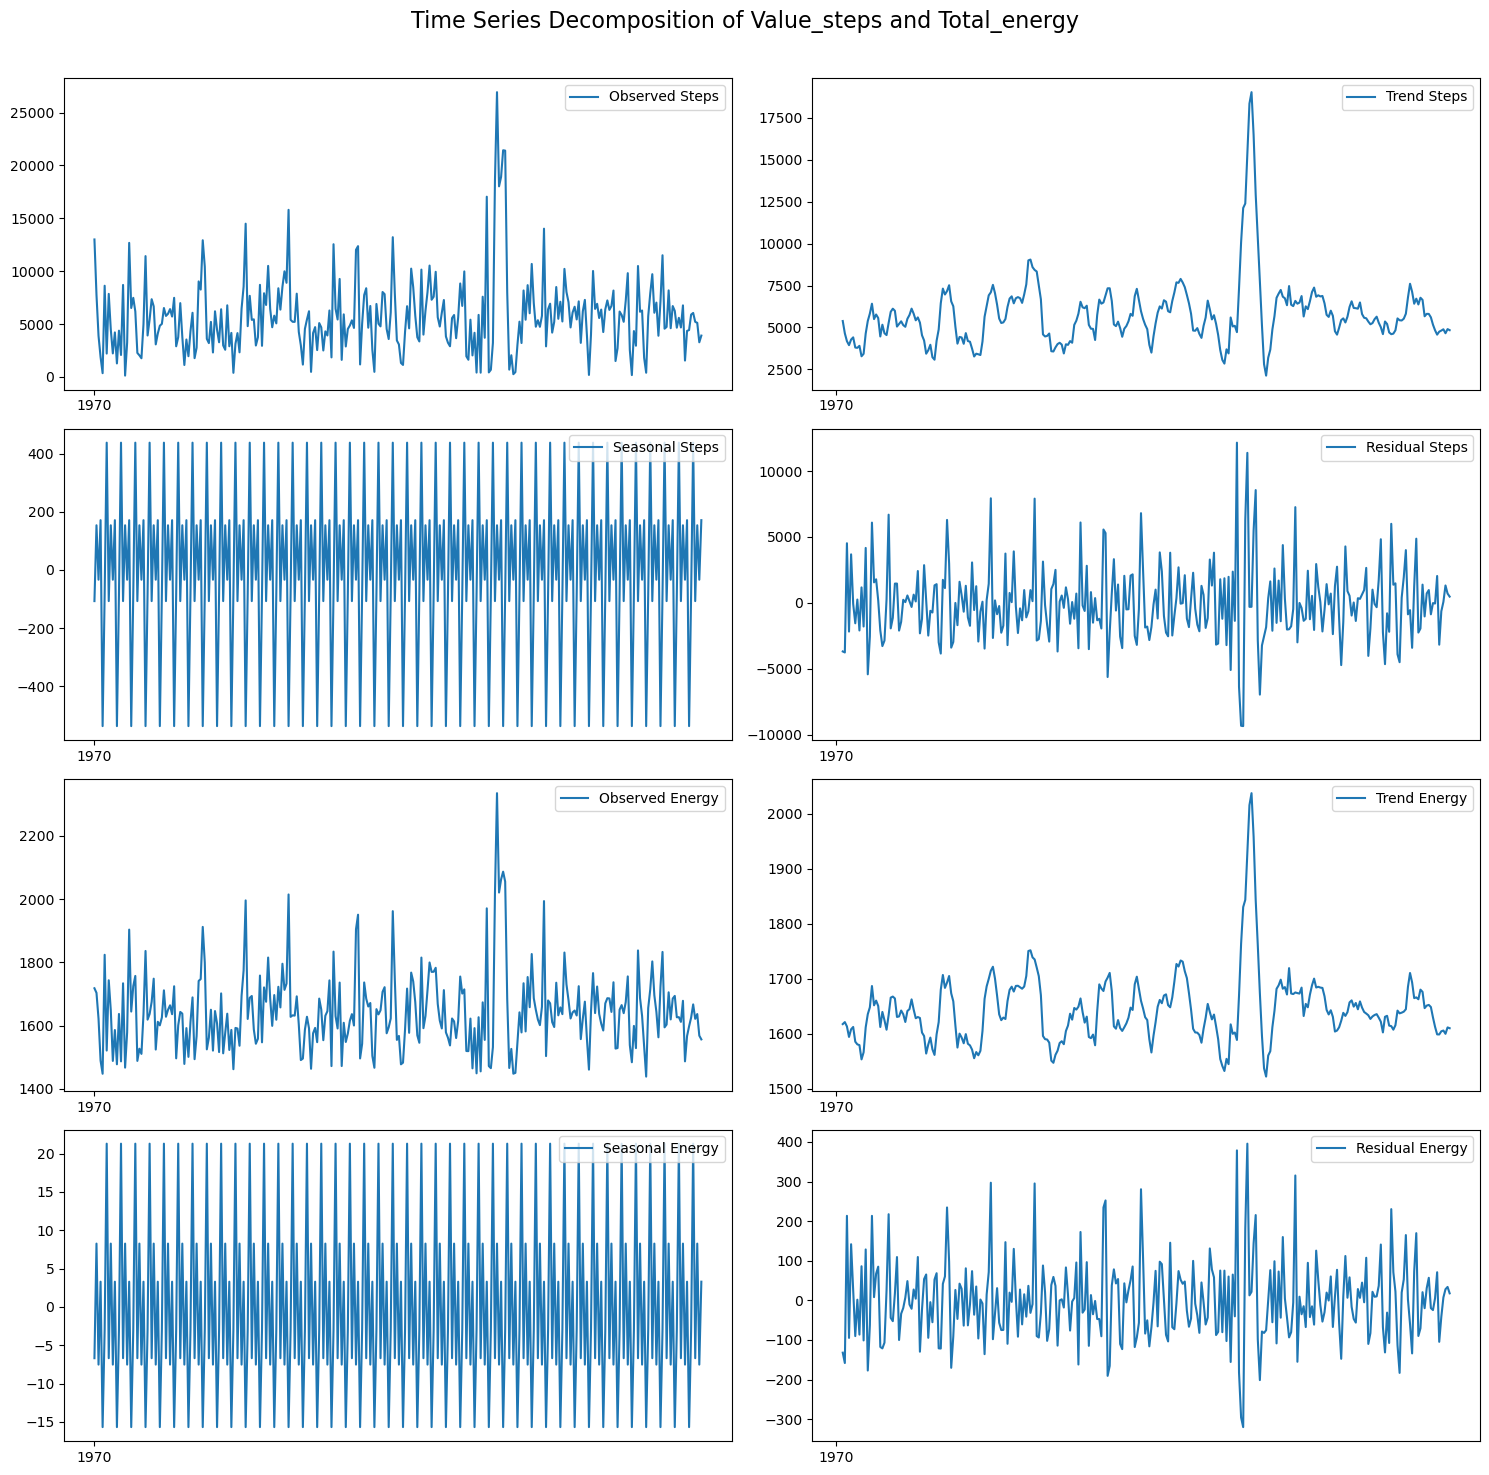

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have a DataFrame 'merged_data' with a datetime index and columns 'Value_steps' and 'Total_energy'
# Replace 'YOUR_DATAFRAME' with the actual DataFrame name

# Ensure that the 'StartDate' column is set as the index and is in datetime format
merged_data.index = pd.to_datetime(merged_data.index)

# Perform seasonal decomposition for 'Value_steps'
result_steps = seasonal_decompose(merged_data['Value_steps'], model='additive', period=7)

# Perform seasonal decomposition for 'Total_energy'
result_energy = seasonal_decompose(merged_data['Total_energy'], model='additive', period=7)

# Plot the decomposed components with a larger figure size
plt.figure(figsize=(15, 15))

# Plot for 'Value_steps'
plt.subplot(4, 2, 1)
plt.plot(result_steps.observed, label='Observed Steps')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(result_steps.trend, label='Trend Steps')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(result_steps.seasonal, label='Seasonal Steps')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(result_steps.resid, label='Residual Steps')
plt.legend()

# Plot for 'Total_energy'
plt.subplot(4, 2, 5)
plt.plot(result_energy.observed, label='Observed Energy')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(result_energy.trend, label='Trend Energy')
plt.legend()

plt.subplot(4, 2, 7)
plt.plot(result_energy.seasonal, label='Seasonal Energy')
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(result_energy.resid, label='Residual Energy')
plt.legend()

plt.suptitle('Time Series Decomposition of Value_steps and Total_energy', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout for suptitle
plt.show()


In [285]:
from sklearn.model_selection import train_test_split

# Assuming 'merged_data' is your DataFrame with the features and target variables
# Replace 'your_target_column' with the actual column you want to predict (e.g., 'Value_steps' or 'Total_energy')

# Define features (X) and target variable (y)
X = merged_data[['Value_steps', 'Value_active_energy', 'Value','Total_energy', 'Interaction_Steps_Energy']]
y = merged_data['Total_energy']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (238, 5)
X_test shape: (60, 5)
y_train shape: (238,)
y_test shape: (60,)


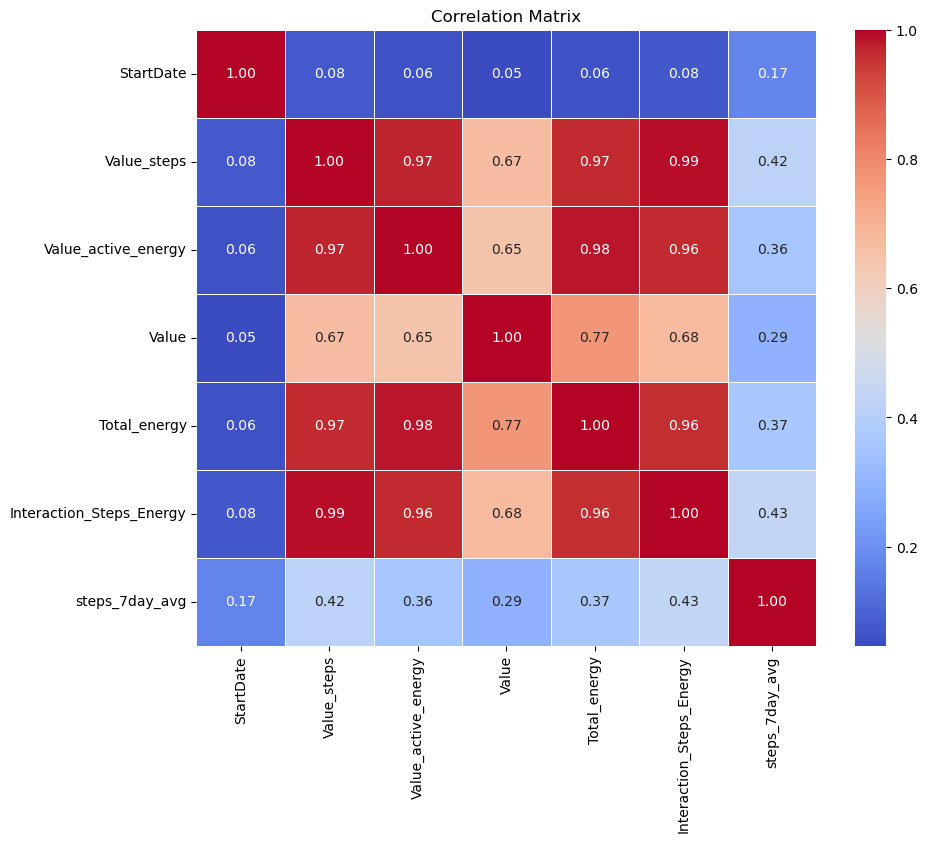

In [286]:
import seaborn as sns

# Assuming 'merged_data' is your DataFrame with features and target variable
correlation_matrix = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


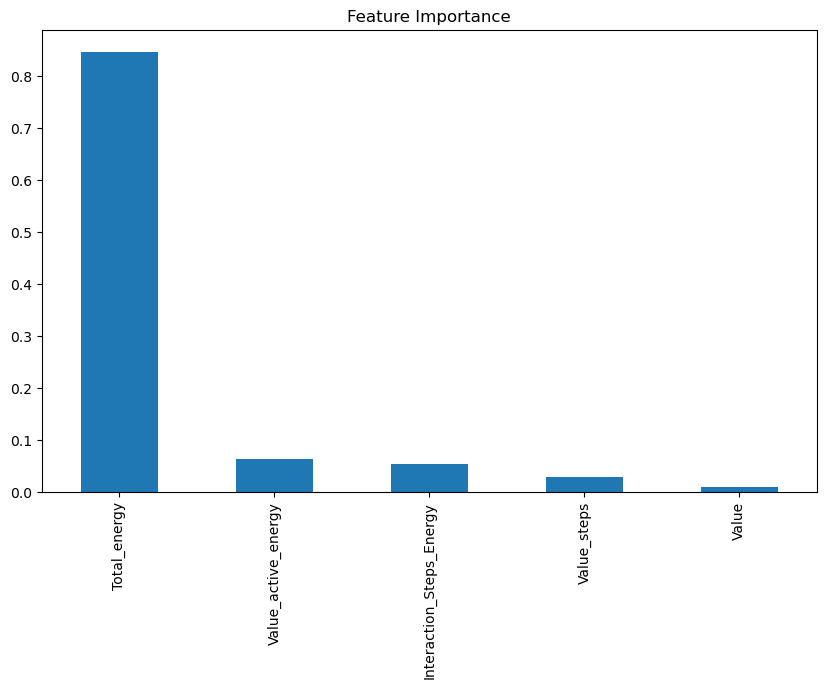

In [287]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'X_train' and 'y_train' are your training data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Display feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


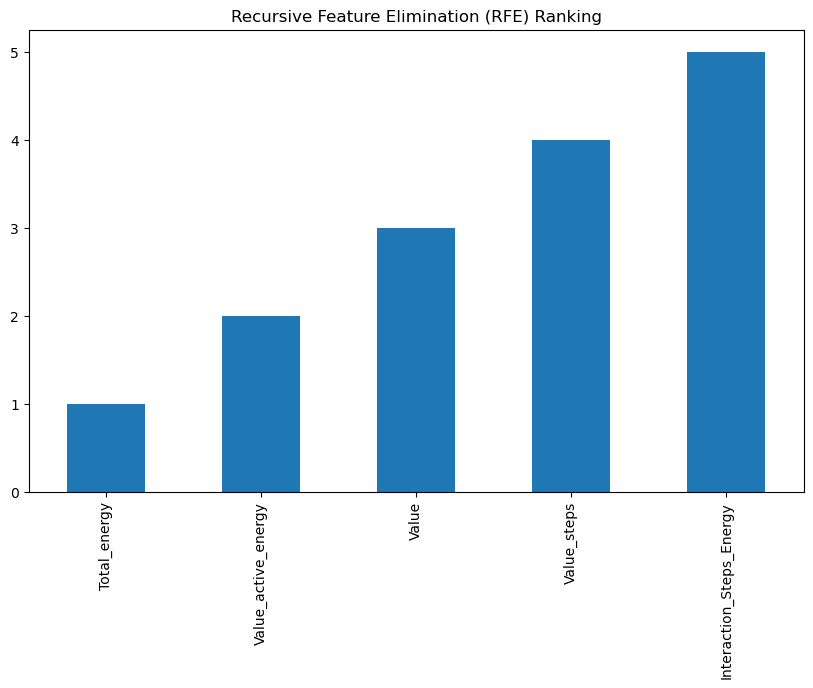

In [288]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # or any other suitable model

# Assuming 'X_train' and 'y_train' are your training data
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X_train, y_train)

# Display feature ranking
ranking = pd.Series(fit.ranking_, index=X_train.columns)
ranking.sort_values(ascending=True).plot(kind='bar', figsize=(10, 6))
plt.title("Recursive Feature Elimination (RFE) Ranking")
plt.show()


In [289]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' is your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [290]:
X_test_scaled = scaler.transform(X_test)


In [291]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'X_train' is your training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [292]:
# Assuming 'X_test' is your test data
X_test_scaled = scaler.transform(X_test)


In [294]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'X' is your feature matrix and 'y_steps', 'y_energy' are your target variables
# X should include the historical number of steps, total energy, and any additional features
# Assuming 'merged_data' is your DataFrame
X = merged_data[['Value_steps', 'Total_energy', 'Interaction_Steps_Energy']]
y_steps = merged_data['Value_steps']
y_energy = merged_data['Total_energy']

# Split the data into training and testing sets
X_train, X_test, y_steps_train, y_steps_test, y_energy_train, y_energy_test = train_test_split(
    X, y_steps, y_energy, test_size=0.2, random_state=42
)

# Create separate models for steps and energy
model_steps = LinearRegression()
model_energy = LinearRegression()

# Train the models
model_steps.fit(X_train, y_steps_train)
model_energy.fit(X_train, y_energy_train)

# Make predictions
y_steps_pred = model_steps.predict(X_test)
y_energy_pred = model_energy.predict(X_test)

# Evaluate the models
mse_steps = mean_squared_error(y_steps_test, y_steps_pred)
r2_steps = r2_score(y_steps_test, y_steps_pred)

mse_energy = mean_squared_error(y_energy_test, y_energy_pred)
r2_energy = r2_score(y_energy_test, y_energy_pred)

print("Steps Model:")
print(f"Mean Squared Error: {mse_steps}")
print(f"R-squared: {r2_steps}")

print("\nEnergy Model:")
print(f"Mean Squared Error: {mse_energy}")
print(f"R-squared: {r2_energy}")


Steps Model:
Mean Squared Error: 5.257174386591088e-24
R-squared: 1.0

Energy Model:
Mean Squared Error: 2.0571209798955415e-20
R-squared: 1.0


In [297]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'y_steps_test' and 'y_energy_test' are the true target values for the testing set
# 'y_steps_pred' and 'y_energy_pred' are the predicted values from your models

# Evaluate the Steps Model
mse_steps = mean_squared_error(y_steps_test, y_steps_pred)
rmse_steps = mean_squared_error(y_steps_test, y_steps_pred, squared=False)  # RMSE
r2_steps = r2_score(y_steps_test, y_steps_pred)

# Evaluate the Energy Model
mse_energy = mean_squared_error(y_energy_test, y_energy_pred)
rmse_energy = mean_squared_error(y_energy_test, y_energy_pred, squared=False)  # RMSE
r2_energy = r2_score(y_energy_test, y_energy_pred)

# Print the results
print("Steps Model:")
print("Mean Squared Error:", mse_steps)
print("Root Mean Squared Error:", rmse_steps)
print("R-squared:", r2_steps)

print("\nEnergy Model:")
print("Mean Squared Error:", mse_energy)
print("Root Mean Squared Error:", rmse_energy)
print("R-squared:", r2_energy)


Steps Model:
Mean Squared Error: 5.257174386591088e-24
Root Mean Squared Error: 2.292852892488109e-12
R-squared: 1.0

Energy Model:
Mean Squared Error: 2.0571209798955415e-20
Root Mean Squared Error: 1.434266704590029e-10
R-squared: 1.0


In [299]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Example for Ridge regression
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_hyperparameters = grid_search.best_params_


In [300]:
from sklearn.model_selection import RandomizedSearchCV

# Example for linear regression
param_dist = {'alpha': [0.01, 0.1, 1.0, 10.0]}
random_search = RandomizedSearchCV(Ridge(), param_dist, n_iter=3, scoring='neg_mean_squared_error', cv=5)
random_search.fit(X_train, y_train)

best_hyperparameters = random_search.best_params_


In [301]:
final_model = Ridge(**best_hyperparameters)
final_model.fit(X_train, y_train)


Ridge(alpha=0.01)

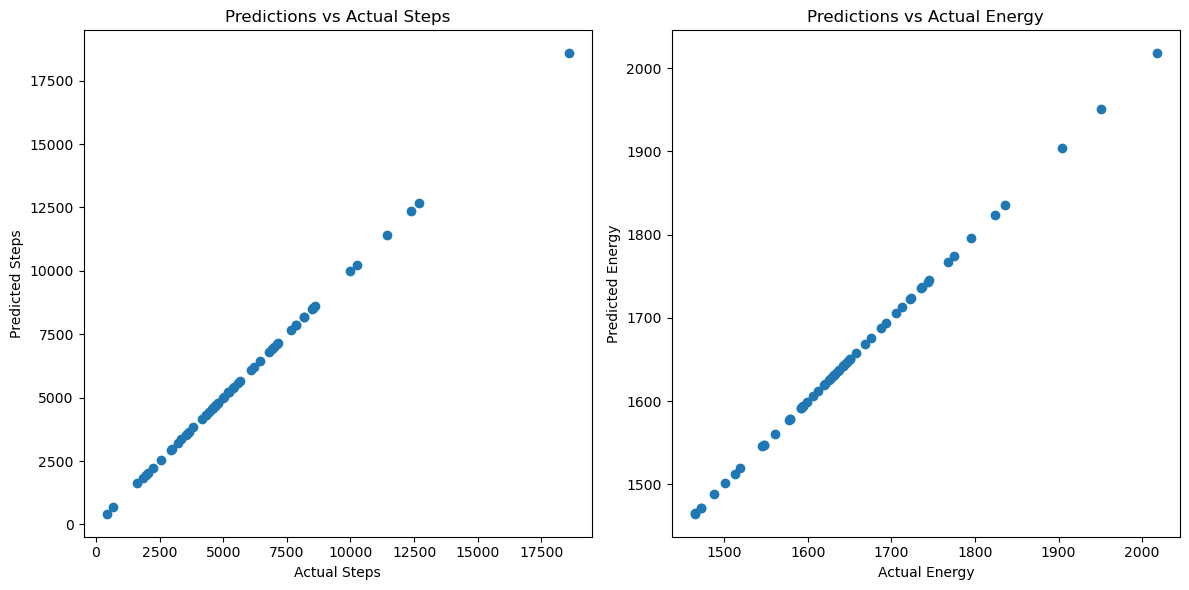

In [302]:
import matplotlib.pyplot as plt

# Assuming 'model_steps' and 'model_energy' are your trained models
# X_test, y_steps_test, and y_energy_test are your test set features and targets

# Predictions for number of steps
predictions_steps = model_steps.predict(X_test)

# Predictions for total energy
predictions_energy = model_energy.predict(X_test)

# Scatter plot for number of steps
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_steps_test, predictions_steps)
plt.title('Predictions vs Actual Steps')
plt.xlabel('Actual Steps')
plt.ylabel('Predicted Steps')

# Scatter plot for total energy
plt.subplot(1, 2, 2)
plt.scatter(y_energy_test, predictions_energy)
plt.title('Predictions vs Actual Energy')
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')

plt.tight_layout()
plt.show()


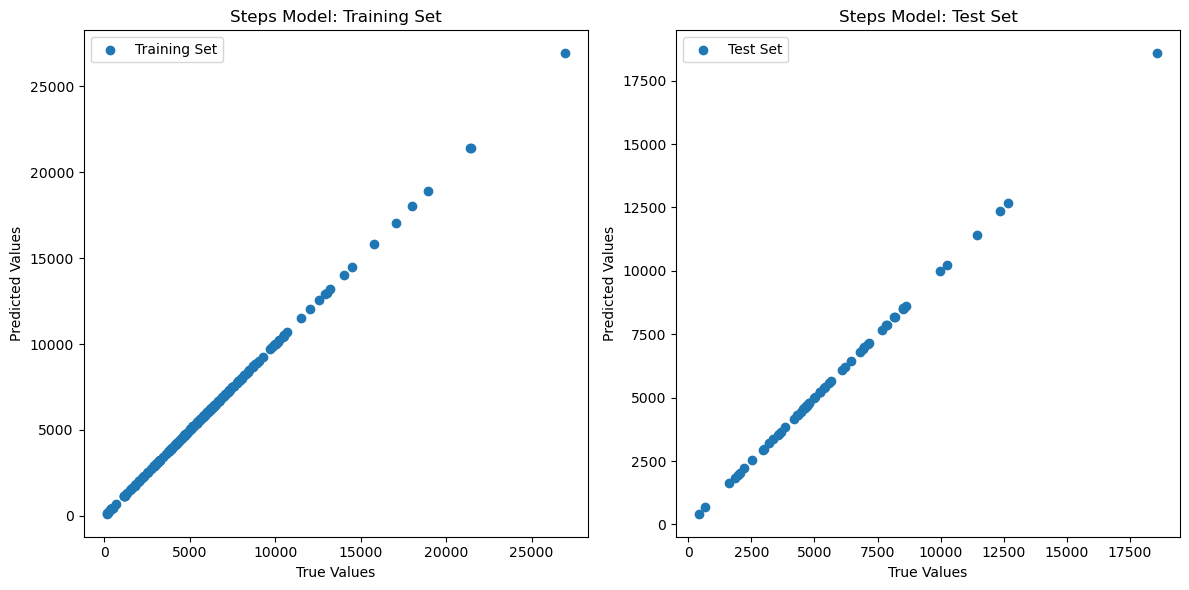

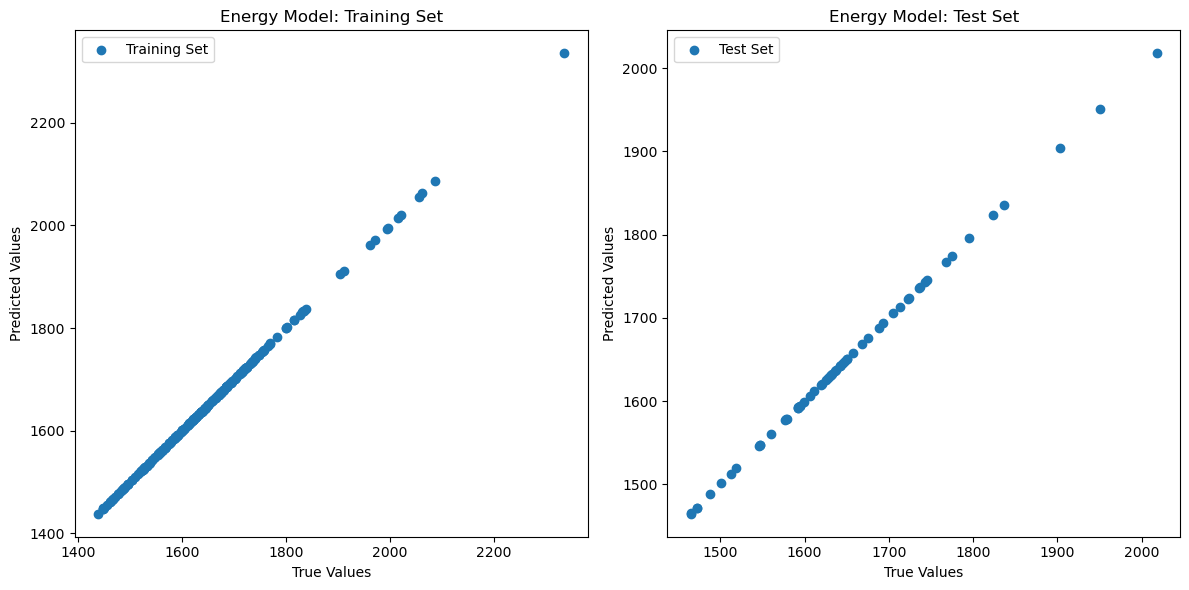

In [303]:
import matplotlib.pyplot as plt

# Assuming 'model_steps' and 'model_energy' are the trained Linear Regression models
# 'X_train', 'y_steps_train', 'y_energy_train' are the training data
# 'X_test', 'y_steps_test', 'y_energy_test' are the testing data

# Predictions on the training set
y_steps_train_pred = model_steps.predict(X_train)
y_energy_train_pred = model_energy.predict(X_train)

# Predictions on the test set
y_steps_test_pred = model_steps.predict(X_test)
y_energy_test_pred = model_energy.predict(X_test)

# Scatter plots for steps model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_steps_train, y_steps_train_pred, label='Training Set')
plt.title('Steps Model: Training Set')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_steps_test, y_steps_test_pred, label='Test Set')
plt.title('Steps Model: Test Set')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

# Scatter plots for energy model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_energy_train, y_energy_train_pred, label='Training Set')
plt.title('Energy Model: Training Set')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_energy_test, y_energy_test_pred, label='Test Set')
plt.title('Energy Model: Test Set')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()
